In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [7]:
df = pd.read_csv("c:/Users/mr.venky/Documents/Titanic-Dataset.csv")

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [10]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

In [13]:
scaler = StandardScaler()

In [14]:
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [15]:
df[numeric_cols].head()

,Age,Fare,SibSp,Parch
0,-0.530377,-0.502445,0.432793,-0.473674
1,0.571831,0.786845,0.432793,-0.473674
2,-0.254825,-0.488854,-0.474545,-0.473674
3,0.365167,0.420730,0.432793,-0.473674
4,0.365167,-0.486337,-0.474545,-0.473674


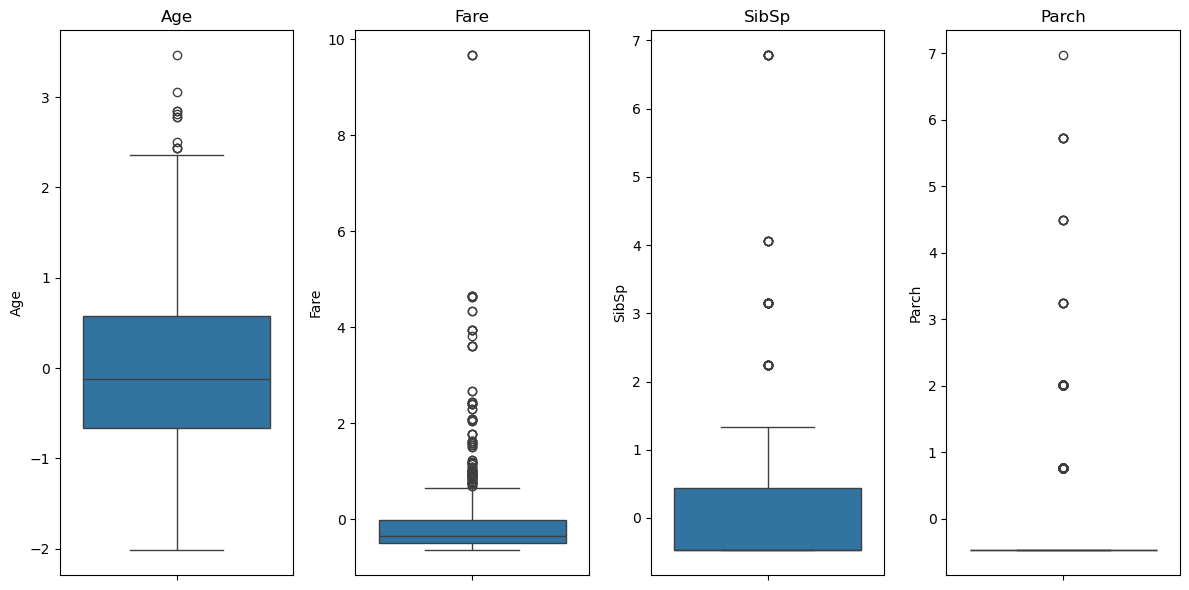

In [16]:
# Boxplots before removing outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [17]:
# Remove outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Check shape after removing outliers
df.shape


(453, 11)